# Homework  8

## Create a tutorial for Association or Clustering Algorithms


Create an ipython notebook to provide a tutorial showing the steps to use a clustering algorithm from one of the following:
http://scikit-learn.org/stable/modules/clustering.html

or 

asscociation rules algorithm from:

https://github.com/asaini/Apriori

or

http://aimotion.blogspot.com/2013/01/machine-learning-and-data-mining.html

Your tutorial will  include

1 a short description of what the algorithm is used for ( and of the code to be used )

2, Data setup

3 Algorithm run

4 Display in graph and plots

5 Discussion of the images in the graphs and plots

6\. Bibliography ( urls and names of pages and authors of used code and descriptions ) 

# 1 Description of Algorithm

The algorithm that I will be investigating is the KMeans clustering algorithm. Most of the information I will present and code come from sklearn website $_1$. 

This algorithm takes in a number k, as the number of clusters to classify. There is a random initialization, which determines the intial location of the k centroids. Then for each point in the data set, the euclidian distance between the point and the k centriods are calculated $_3$:

$$S_{i}^{(t)}={\big \{}x_{p}:{\big \|}x_{p}-m_{i}^{(t)}{\big \|}^{2}\leq {\big \|}x_{p}-m_{j}^{(t)}{\big \|}^{2}\ \forall j,1\leq j\leq k{\big \}}$$

Where each $x_{p}$ is assigned to exactly one $S^{(t)}$, even if it could be assigned to more than one of them.

The centroid that is closest to the point will now include that point in its cluster and the location of that centroid will be updated including the new point. The updated location of the centroid is calculated by finding the "center" or average location of all the points in the cluster. The update formula is as follows $_3$:

$$m_{i}^{(t+1)}={\frac {1}{|S_{i}^{(t)}|}}\sum _{x_{j}\in S_{i}^{(t)}}x_{j}$$

This continues until there is convergence. In otherwords this algorthm will keep iterating until there are no more updates in the clusters or changes to the centroid.

I have put together a small illustrative example to show how this works.


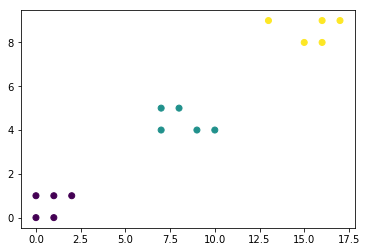

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import cluster

x=[1,1,2,0,0,7,8,9,7,10,13,15,17,16,16]
y=[0,1,1,0,1,4,5,4,5,4,9,8,9,8,9]
color=[0,0,0,0,0,1,1,1,1,1,2,2,2,2,2]
x=np.array(x)
y=np.array(y)
df=pd.DataFrame({'x':x,'y':y})
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=color)
plt.show()
df['color']=color

I have created three clusters to demonstrate the clustering algorithm and how to use it. First we need to import cluster from sklearn in order to use its KMeans function. The KMeans function takes in the number of clusters you want to use, then you can use the fit funtion to have it run on your data. We need to put x and y into one array in order for the fit funtion to work. 

In [5]:
X=np.array(df[['x','y']])

Now I can use the Kmeans funtion and have it fit our data. I also know that we have 3 clusters, so I will specify that as our k.

In [6]:
kmeans=cluster.KMeans(n_clusters=3,random_state=0).fit(X)
kmeans.labels_

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

I can now investigate the clusters and distinguish which clusters are correct.

In [7]:
df['predict']=kmeans.labels_
for i in range(0,15):
    if df.iloc[i,3]==0:
        df.iloc[i,3]=2
    else:
        if df.iloc[i,3]==1:
            df.iloc[i,3]=1
        else:
            if df.iloc[i,3]==2:
                df.iloc[i,3]=0
print df.iloc[:,[2,3]]
numcorrect=0
for i in range(0,len(df.iloc[:,3])):
    if df.iloc[i,2]==df.iloc[i,3]:
        numcorrect=numcorrect+1
print "Number correct: ",numcorrect
print "Total number of instances: ",(len(df.iloc[:,0])*1.0)
print "Accuracy: ",numcorrect/(len(df.iloc[:,1])*1.0)*100,"%"

    color  predict
0       0        0
1       0        0
2       0        0
3       0        0
4       0        0
5       1        1
6       1        1
7       1        1
8       1        1
9       1        1
10      2        2
11      2        2
12      2        2
13      2        2
14      2        2
Number correct:  15
Total number of instances:  15.0
Accuracy:  100.0 %


We can see that the k means algorithm clustered the points into 3 groups and all were exactly as expected. Therefore, the accuracy we computed comes out to 100%

# 2 Data Set Up

Now I will do a similar example on a more interesting data set. I got the data from Kaggle: https://www.kaggle.com/uciml/autompg-dataset 

The dataset gives specs on 398 different cars including miles per gallon, number of cylinders, displacement, horsepower, weight, acceleration, model year, origin, and the name of the car.

I thought that this would be an iteresting data set to investigate since we know there could possibly be 3 clusters: 4, 6, and 8 cylinder engines.

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
Horsepower vs MPG


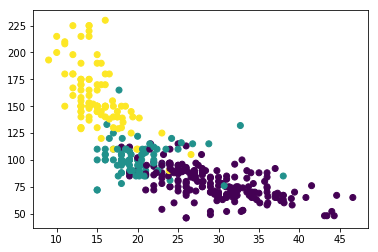

Horsepower vs Weight


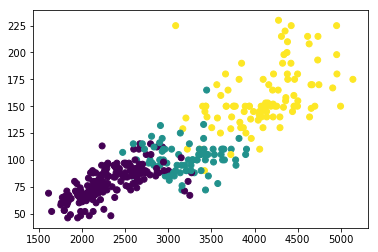

Acceleration vs MPG


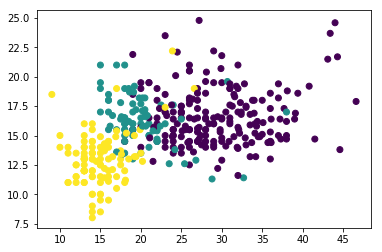

In [8]:
#Read in data
df0=pd.read_csv("auto-mpg.csv")
print df0.head()

#Make sure the types are ok
df0.dtypes

#remove 3 and 5 cylinder
df0.cylinders.unique()
df0=df0[df0.iloc[:,3]!='?']
df0=df0[df0.iloc[:,1]!=3]
df0=df0[df0.iloc[:,1]!=5]


#Plot interesting relationships
print "Horsepower vs MPG"
plt.scatter(df0.iloc[:,0],df0.iloc[:,3],c=df0.iloc[:,1])
plt.show()
print "Horsepower vs Weight"
plt.scatter(df0.iloc[:,4],df0.iloc[:,3],c=df0.iloc[:,1])
plt.show()
print "Acceleration vs MPG"
plt.scatter(df0.iloc[:,0],df0.iloc[:,5],c=df0.iloc[:,1])
plt.show()


I plotted 3 different relationships that I thought would be interesting to investigate. For each, I colord the points by the type of engine it had (yellow is 8, blue is 6, and purple is 4 cylinder). We can see that the more MPG you get, the less horsepower you will have. On the otherhand, the heavier your car is, the more horsepower it will have. The last plot has a very weakly correlated positive relationship. So the more gas milage you have, the more acceleration you will have. This was suprising to me because I would think that more acceleration would mean that you need more horsepower.

# 3 Algorithm Run

I will now run the algorithm a couple different ways. First, I will do it for the three relationships above with only the data for the plot. Then I will run the algorithm for all data and see how it effects the predictions when we include all the data. Since we already imported cluster and sklearn above we don't need to import it again. We can just run the KMeans funtion on our data. 

In [19]:
#Horsepower and Weight
x=np.array(df0[['mpg','horsepower']])
#x
kmeans1=cluster.KMeans(n_clusters=3,random_state=0).fit(x)
#kmeans1.labels_


#Weight and Horsepower
x=np.array(df0[['horsepower','weight']])
#x
kmeans2=cluster.KMeans(n_clusters=3,random_state=0).fit(x)
#kmeans2.labels_


#MPG and Acceleration
x=np.array(df0[['mpg','acceleration']])
#x
kmeans3=cluster.KMeans(n_clusters=3,random_state=0).fit(x)
#kmeans3.labels_

#Run for all 4 vars
x=np.array(df0[['mpg','horsepower','weight','acceleration']])
#x
kmeans4=cluster.KMeans(n_clusters=3,random_state=0).fit(x)
#kmeans4.labels_


# 4 Display Graphs and Plots

The following graphs include the predicted and actual colorings of the clusters. Because the predicted values are from the algorithm, their coloring will be different than the original. However, we can still compare the predicted to the actual in the graphs. The first 6 plots are from the first 3 KMeans algorithms with only the two predictors in each case.

Predicted Horsepower vs MPG


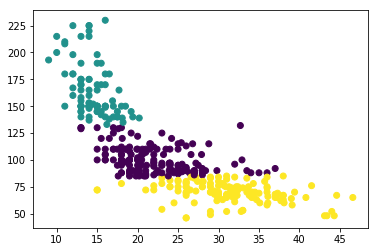

Actual Horsepower vs MPG


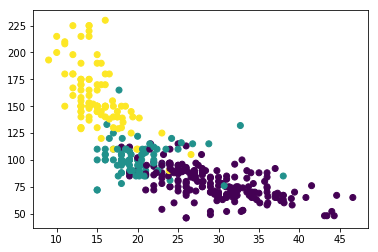

Predicted Horsepower vs Weight


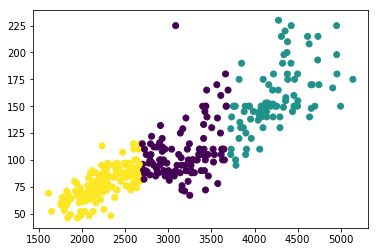

Actual Horsepower vs Weight


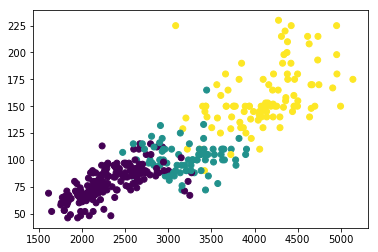

Predicted Acceleration vs MPG


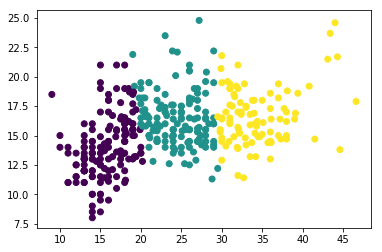

Actual Acceleration vs MPG


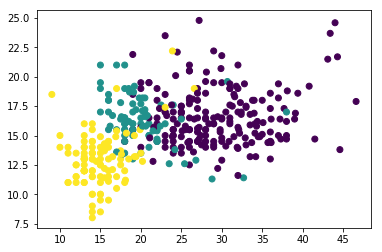

In [20]:
#Predicted Clusters
print "Predicted Horsepower vs MPG"
plt.scatter(df0.iloc[:,0],df0.iloc[:,3],c=kmeans1.labels_)
plt.show()
#Actual Clusters
print "Actual Horsepower vs MPG"
plt.scatter(df0.iloc[:,0],df0.iloc[:,3],c=df0.iloc[:,1])
plt.show()
#Predicted Clusters
print "Predicted Horsepower vs Weight"
plt.scatter(df0.iloc[:,4],df0.iloc[:,3], c=kmeans2.labels_)
plt.show()
#Actual Clusters
print "Actual Horsepower vs Weight"
plt.scatter(df0.iloc[:,4],df0.iloc[:,3],c=df0.iloc[:,1])
plt.show()
#Predicted Clusters
print "Predicted Acceleration vs MPG"
plt.scatter(df0.iloc[:,0],df0.iloc[:,5], c=kmeans3.labels_)
plt.show()
#Actual Clusters
print "Actual Acceleration vs MPG"
plt.scatter(df0.iloc[:,0],df0.iloc[:,5],c=df0.iloc[:,1])
plt.show()


The next 6 plots are from the kmeans algorithm were we predicted the clusters based on all four predictors. For these plots, I changed the colors to match what we would expect. This will allow for an easier comparison of the actual vs expected plots.

Predicted Horsepower vs MPG


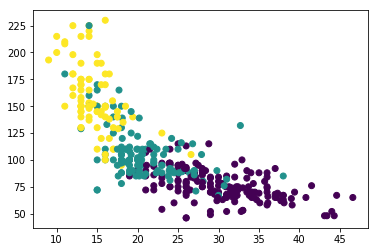

Actual Horsepower vs MPG


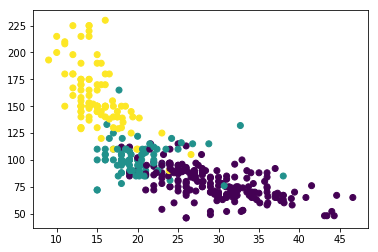

Predicted Horsepower vs Weight


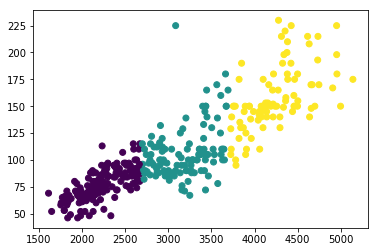

Actual Horsepower vs Weight


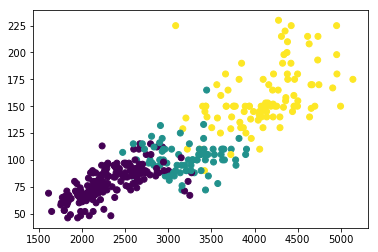

Predicted Acceleration vs MPG


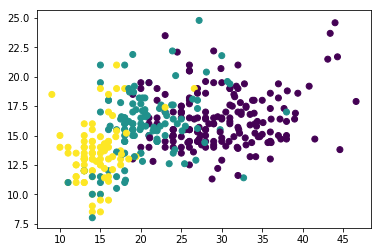

Actual Acceleration vs MPG


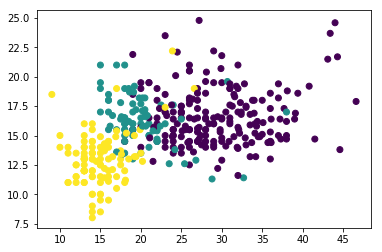

In [21]:
df0['predict']=kmeans4.labels_
for i in range(0,len(df0.iloc[:,9])):
    if df0.iloc[i,9]==0:
        df0.iloc[i,9]=6
    else:
        if df0.iloc[i,9]==1:
            df0.iloc[i,9]=8
        else:
            if df0.iloc[i,9]==2:
                df0.iloc[i,9]=4

#Predicted Clusters
print "Predicted Horsepower vs MPG"
plt.scatter(df0.iloc[:,0],df0.iloc[:,3], c=df0.iloc[:,9])
plt.show()
#Actual Clusters
print "Actual Horsepower vs MPG"
plt.scatter(df0.iloc[:,0],df0.iloc[:,3],c=df0.iloc[:,1])
plt.show()
#Predicted Clusters
print "Predicted Horsepower vs Weight"
plt.scatter(df0.iloc[:,4],df0.iloc[:,3], c=df0.iloc[:,9])
plt.show()
#Actual Clusters
print "Actual Horsepower vs Weight"
plt.scatter(df0.iloc[:,4],df0.iloc[:,3],c=df0.iloc[:,1])
plt.show()
#Predicted Clusters
print "Predicted Acceleration vs MPG"
plt.scatter(df0.iloc[:,0],df0.iloc[:,5], c=df0.iloc[:,9])
plt.show()
#Actual Clusters
print "Actual Acceleration vs MPG"
plt.scatter(df0.iloc[:,0],df0.iloc[:,5],c=df0.iloc[:,1])
plt.show()

# 5 Discussion of the Graphs and Plots

First let us consider the first 6 plots. For each of these plots, our KMeans algorithm only took in two predictors. These predictors were the two in each plot. For example, the first two plots show predicted clusters and the actual clusters when only considering MPG and horsepower. We can see that it does a fairly good job in predicting the clusters (4,6,8 cylinders). Similarly the other two, horsepower/weight and mpg/acceleration does a decent job classifying the clusters. However, since we only considered two predictors the predictions are very geometric. 

In the second set of 6 plots, we are predicting the clusters based on 4 predictors: mpg, horsepower, weight and acceleration. In addition, I changed the colors of the predicted clusters to match the color scheme of the actual clusters to make comparison easier. All of these plots used the same prediction from the kmeans algorithm for all four predictors. Each plot is a snap shot of the predicted clusters given the x and y variables specified. We can see that for all of these predicted plots, it does much better than the ones before. Each plots predicted clusters are not all together, you can see that there are some that are mixed in with the others. For example in the acceleration and mpg, we can see that there is a yellow V8 with about 27 mpg and 19 acceleration, which is mixed in with the 4 and 6 cylinders. This was not correctly predicted when only acceleration and mpg were in our KMeans, but when we consider all four predictors, it is correctly predicted.

In addition, for the last kmeans, I calculated the accuracy of our predictions.

In [22]:
numcorrect=0
for i in range(0,len(df0.iloc[:,9])):
    if df0.iloc[i,1]==df0.iloc[i,9]:
        numcorrect=numcorrect+1
print "number of correct predictions: ",numcorrect
print "total number of data points: ",(len(df0.iloc[:,1])*1.0)
print "accuracy: ",numcorrect/(len(df0.iloc[:,1])*1.0)*100,"%"

number of correct predictions:  326
total number of data points:  385.0
accuracy:  84.6753246753 %


We correctly predicted 326 out of the total 385 data points, which gave us an accuracy of 84.67% 

Accuracy can help tell us how well the algorithm predicts the true values. This however is only possible because we already know what the values should be. In a different clustering senario, we might not know the cylinders of the cars. In which case, we might try to use these algorithms in order to try and find some relationships or special groupings between the different cylinders.

# 6 Bibliography


1\. 2.3. Clustering¶. (n.d.). Retrieved November 20, 2017, from http://scikit-learn.org/stable/modules/clustering.html

This is were I got the code to run kmeans and how to make preditions.

2\. Plotting¶. (n.d.). Retrieved November 20, 2017, from http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html

3\. Matplotlib.pyplot.scatter¶. (n.d.). Retrieved November 20, 2017, from https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html

The plots that I created used 2 and 3 as resources.

4\. K-means clustering. (2017, November 12). Retrieved November 20, 2017, from https://en.wikipedia.org/wiki/K-means_clustering

5\. Sklearn.cluster.KMeans¶. (n.d.). Retrieved November 20, 2017, from http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Some of the notation and explanation of the algorithm came from 4 and 5.